In [124]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [125]:
# K : K Armed Bandit
K = 10
# stepSize : Number of Steps
stepSize = 1000
#alpha : constant value of step size
alpha = 0.1
#Runs : 2000
Runs = 2000

In [126]:
def returnRewardTimeStepMean(estimatedValueFunctionOriginal, epsilon, nonStationary, meanAverage):
    
    currentTime = time.time()
    rewardTimeStep = np.zeros(stepSize)
    optimalActionStep = np.zeros(stepSize)
    for runs in range(Runs):
        trueValueFunction = np.random.randn(K)
        estimatedValueFunction = np.copy(estimatedValueFunctionOriginal)
        alphaAction = np.zeros(K)
        for i in range(stepSize):
            epsilonProbability = random.uniform(0,1)
            
            if epsilonProbability >= epsilon :
                actionIndex = np.argmax(estimatedValueFunction)
            else :
                actionIndex = random.randint(0,K-1)
                    
            mean, sigma = trueValueFunction[actionIndex], 1
            actionReward = np.random.normal(mean, sigma, 1)
            
            bestTrueAction = np.argmax(trueValueFunction)
            
            if actionIndex == bestTrueAction:
                optimalActionStep[i] += 1
            
            rewardTimeStep[i] += actionReward
            
            alphaAction[actionIndex] += 1
            
            if meanAverage == True:
                constant = 1/alphaAction[actionIndex]
            else:
                constant = alpha
                
            estimatedValueFunction[actionIndex] += constant*(actionReward - estimatedValueFunction[actionIndex])
        
            if nonStationary == True:
                incrementalUpdate = np.random.normal(0,0.01,10)
                trueValueFunction += incrementalUpdate
    
    rewardTimeStepMean = rewardTimeStep/Runs
    optimalActionStep /= Runs
    optimalActionStep *= 100

    print("Time taken : ", time.time() - currentTime)
    return rewardTimeStepMean, optimalActionStep

## <span style='color:Black'> Non Stationary Problem with Contant Alpha = 0.1 </span>

In [127]:
estimatedValueFunction = np.zeros(K)
nonStationary = True
epsilon = 0.1
meanAverage = False
rewardTimeStepMean_1, optimalActionStep_1 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  75.66742610931396


## <span style='color:Black'> Non Stationary Problem with Average Mean </span>

In [128]:
estimatedValueFunction = np.zeros(K)
nonStationary = True
epsilon = 0.1
meanAverage = True
rewardTimeStepMean_2, optimalActionStep_2 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  75.34426712989807


## <span style='color:Black'> Stationary Problem with Contant Alpha = 0.1 </span>

In [129]:
estimatedValueFunction = np.zeros(K)
nonStationary = False
epsilon = 0.1
meanAverage = False
rewardTimeStepMean_3, optimalActionStep_3 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  50.322545289993286


## <span style='color:Black'> Stationary Problem with Average Mean </span>

In [130]:
estimatedValueFunction = np.zeros(K)
nonStationary = False
epsilon = 0.1
meanAverage = True
rewardTimeStepMean_4, optimalActionStep_4 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  53.36066389083862


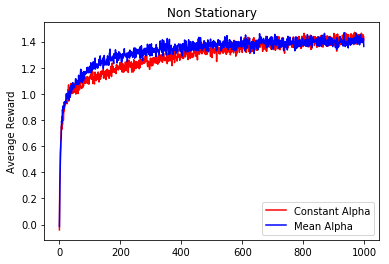

In [139]:
plt.figure()
plt.title('Non Stationary')
plt.ylabel('Average Reward')
plt.plot(rewardTimeStepMean_1, 'r', label='Constant Alpha')
plt.plot(rewardTimeStepMean_2, 'b', label='Mean Alpha')
plt.legend(loc='lower right')
plt.show()

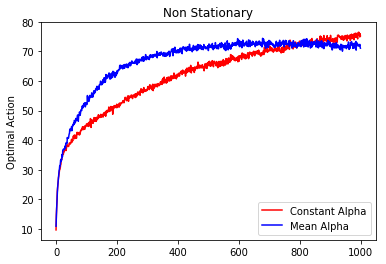

In [140]:
plt.figure()
plt.title('Non Stationary')
plt.ylabel('Optimal Action')
plt.plot(optimalActionStep_1, 'r', label='Constant Alpha')
plt.plot(optimalActionStep_2, 'b', label='Mean Alpha')
plt.legend(loc='lower right')
plt.show()

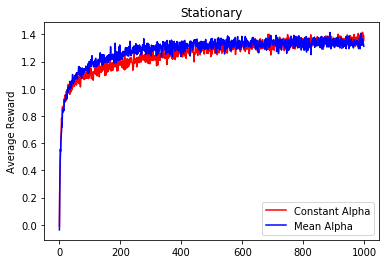

In [141]:
plt.figure()
plt.title('Stationary')
plt.ylabel('Average Reward')
plt.plot(rewardTimeStepMean_3, 'r', label='Constant Alpha')
plt.plot(rewardTimeStepMean_4, 'b', label='Mean Alpha')
plt.legend(loc='lower right')
plt.show()

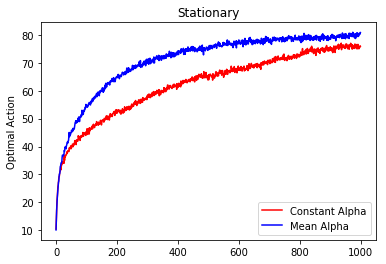

In [142]:
plt.figure()
plt.title('Stationary')
plt.ylabel('Optimal Action')
plt.plot(optimalActionStep_3, 'r', label='Constant Alpha')
plt.plot(optimalActionStep_4, 'b', label='Mean Alpha')
plt.legend(loc='lower right')
plt.show()

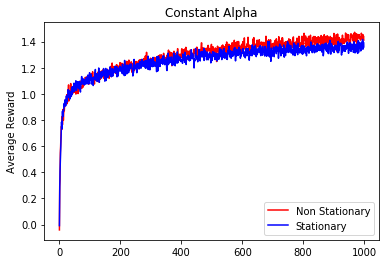

In [143]:
plt.figure()
plt.title('Constant Alpha')
plt.ylabel('Average Reward')
plt.plot(rewardTimeStepMean_1, 'r', label='Non Stationary')
plt.plot(rewardTimeStepMean_3, 'b', label='Stationary')
plt.legend(loc='lower right')
plt.show()

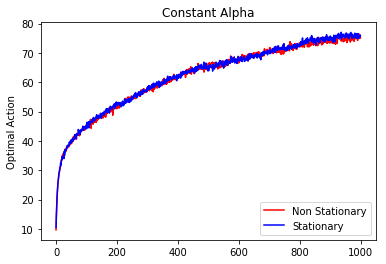

In [144]:
plt.figure()
plt.title('Constant Alpha')
plt.ylabel('Optimal Action')
plt.plot(optimalActionStep_1, 'r', label='Non Stationary')
plt.plot(optimalActionStep_3, 'b', label='Stationary')
plt.legend(loc='lower right')
plt.show()

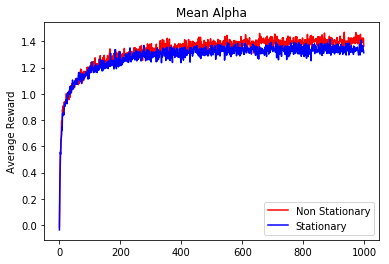

In [145]:
plt.figure()
plt.title('Mean Alpha')
plt.ylabel('Average Reward')
plt.plot(rewardTimeStepMean_2, 'r', label='Non Stationary')
plt.plot(rewardTimeStepMean_4, 'b', label='Stationary')
plt.legend(loc='lower right')
plt.show()

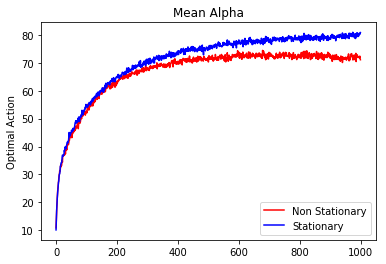

In [146]:
plt.figure()
plt.title('Mean Alpha')
plt.ylabel('Optimal Action')
plt.plot(optimalActionStep_2, 'r', label='Non Stationary')
plt.plot(optimalActionStep_4, 'b', label='Stationary')
plt.legend(loc='lower right')
plt.show()